In [14]:
import os
os.environ['DATASET_DIR']='/Users/julianquast/Documents/Bachelor Thesis/Datasets/rearrange_10k_v1'


In [17]:
!pip install torch
!pip install einops


import abc
import torch
import numpy as np
from torch.utils.data import Dataset
from typing import Optional, Sequence, List
from torch.utils.data import Dataset, Subset
from torch import default_generator, randperm
from einops import rearrange

In [22]:
from datasets.rearrange_dset import load_rearrange_slice_train_val

datasets, traj_dset = load_rearrange_slice_train_val(
    transform=None,
    n_rollout=2,
    data_path='/Users/julianquast/Documents/Bachelor Thesis/Datasets/rearrange_2k_v1_zip/rearrange_2000',
    filter_train=True,
    n_slices_train=32,
    filter_val=True,
    n_slices_val=16,
    filter_actions={4, 5},
    seed_train=1337,
    seed_val=123,
    verbose=True
)
sample = datasets['train'][0]
obs, act, state = sample
print('visual shape:', obs['visual'].shape)
print('proprio shape:', obs['proprio'].shape)
print('action shape:', act.shape)
print('state shape:', state.shape)

from torch.utils.data import DataLoader
loader = DataLoader(datasets['train'], batch_size=32)
batch_obs, batch_act, batch_state = next(iter(loader))
print('batch visual shape:', batch_obs['visual'].shape)
print('batch proprio shape:', batch_obs['proprio'].shape)
print('batch action shape:', batch_act.shape)
print('batch state shape:', batch_state.shape)
print( len(batch_obs))

created dset
[[0], [1]]
created dset_train, dset_val, train_slices, val_slices 
[Filter] Matched: 2 | Non-matched: 137
filtered train_slices
[Filter] Matched: 2 | Non-matched: 140
filtered val_slices
visual shape: torch.Size([4, 3, 224, 224])
proprio shape: torch.Size([4, 1])
action shape: torch.Size([4, 1])
state shape: torch.Size([4, 0])
batch visual shape: torch.Size([32, 4, 3, 224, 224])
batch proprio shape: torch.Size([32, 4, 1])
batch action shape: torch.Size([32, 4, 1])
batch state shape: torch.Size([32, 4, 0])
2


Showing 16 slices out of 16


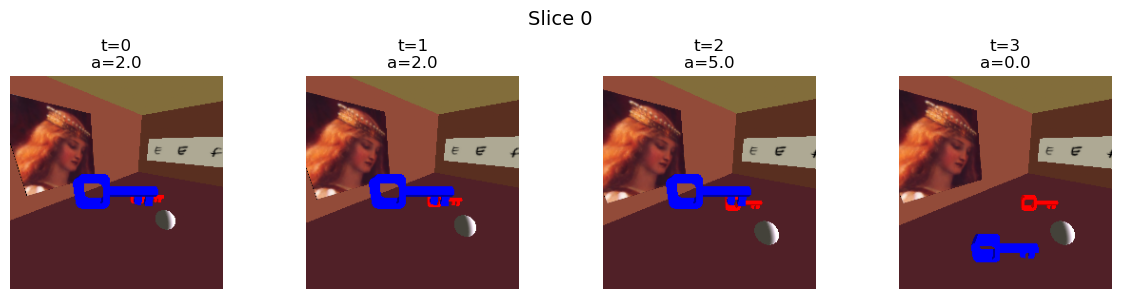

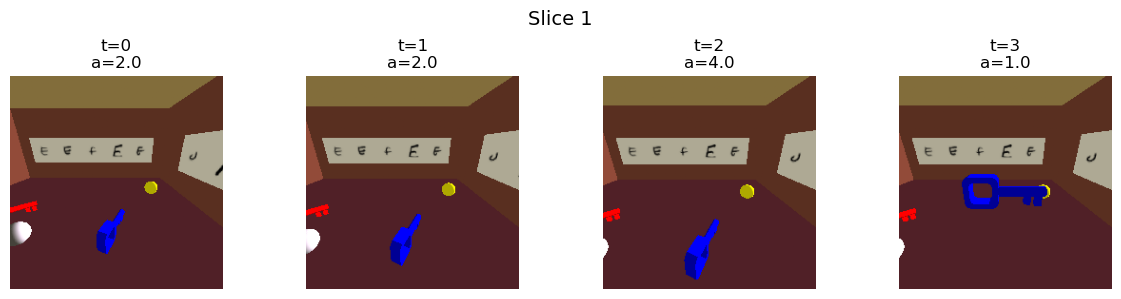

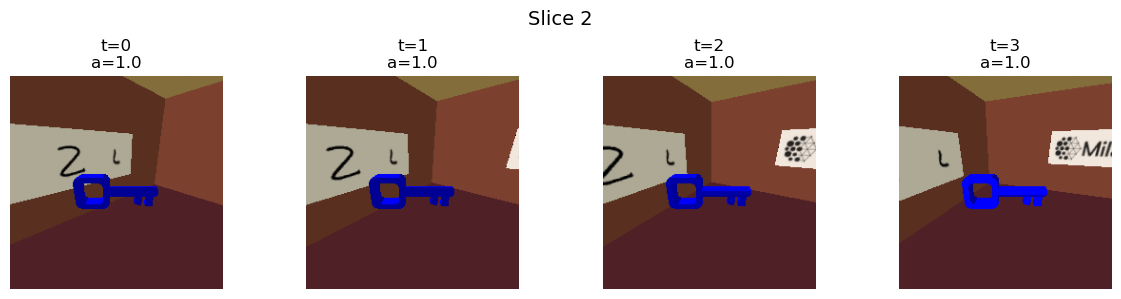

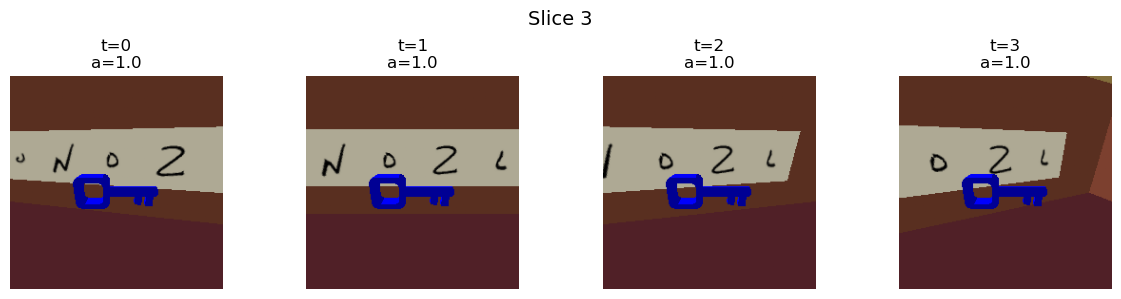

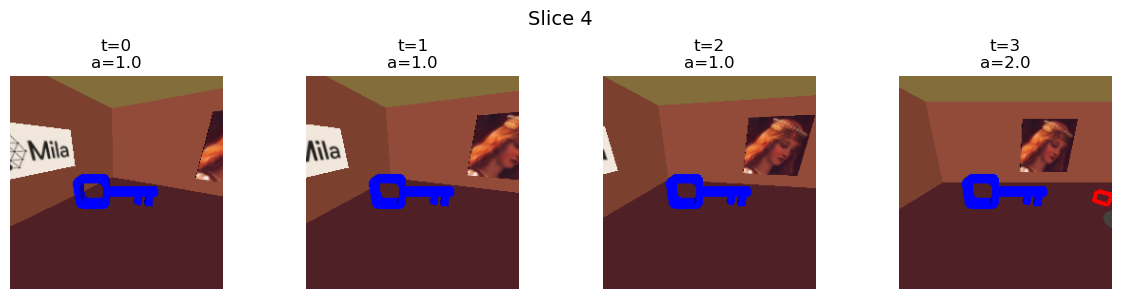

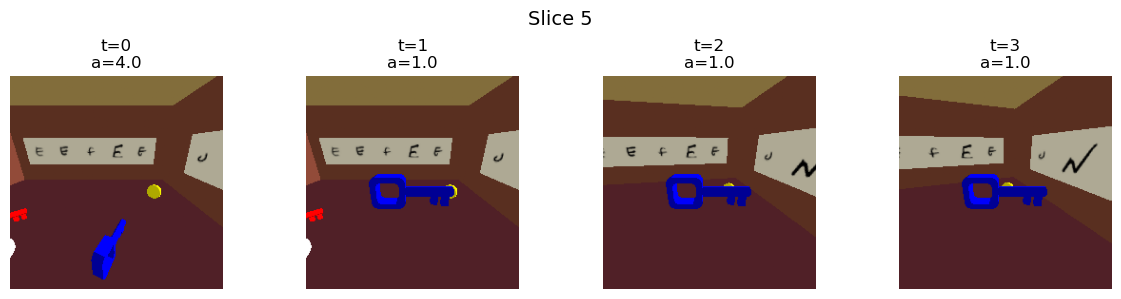

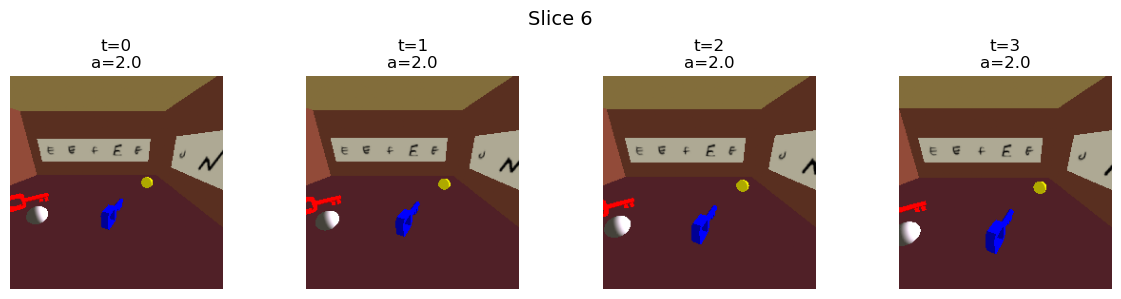

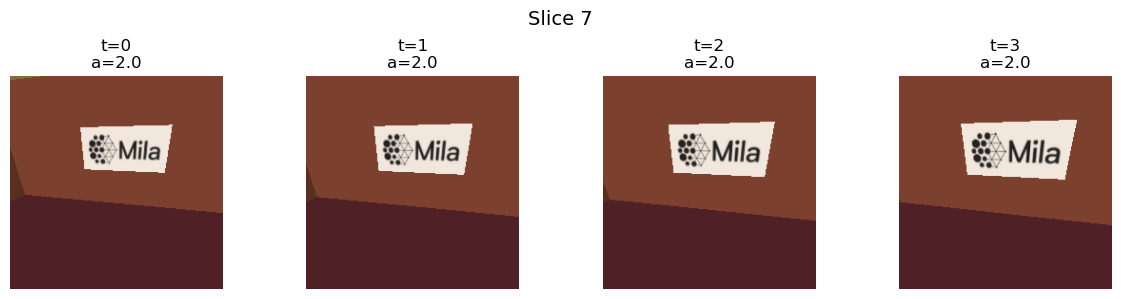

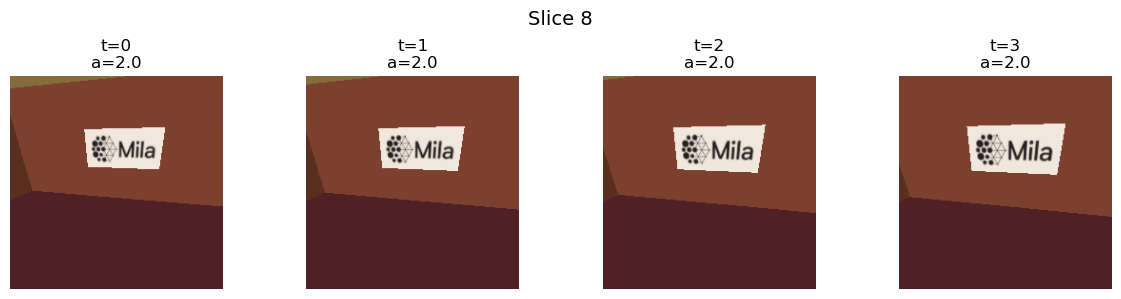

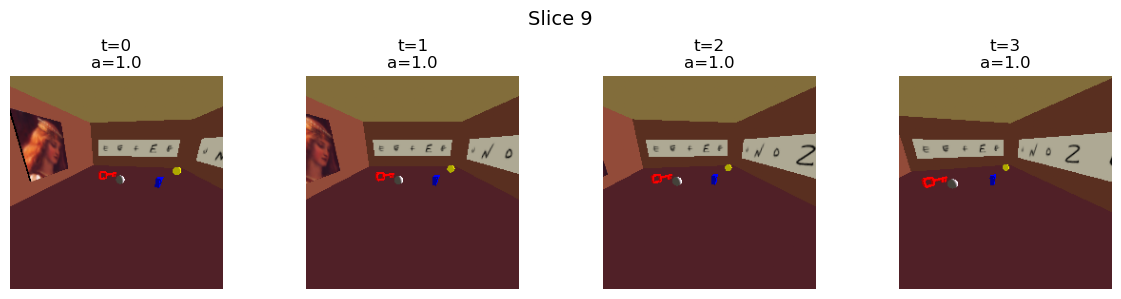

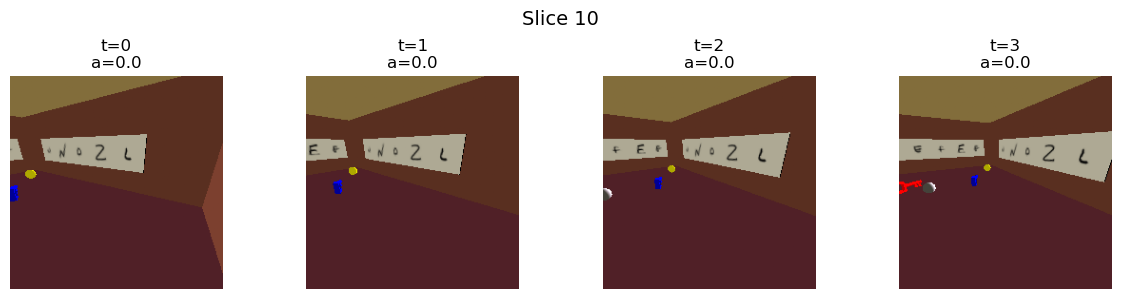

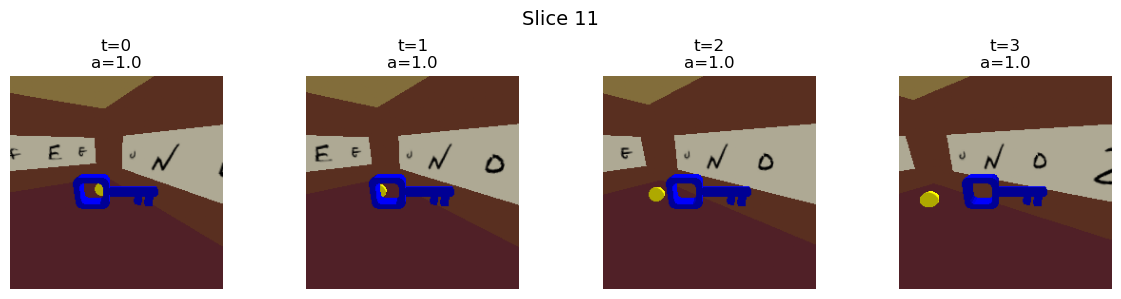

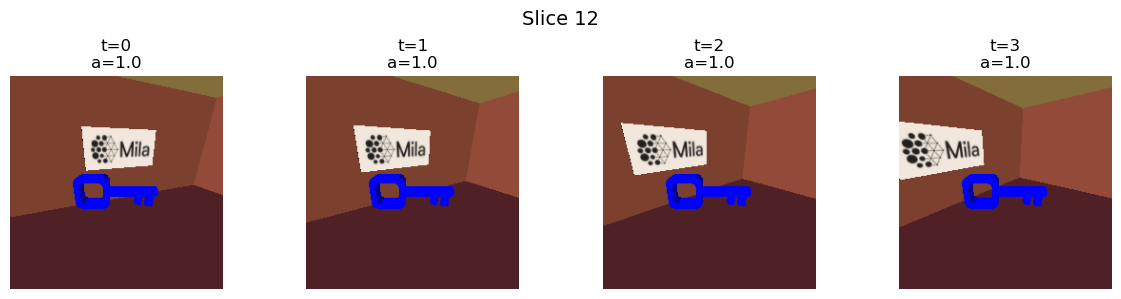

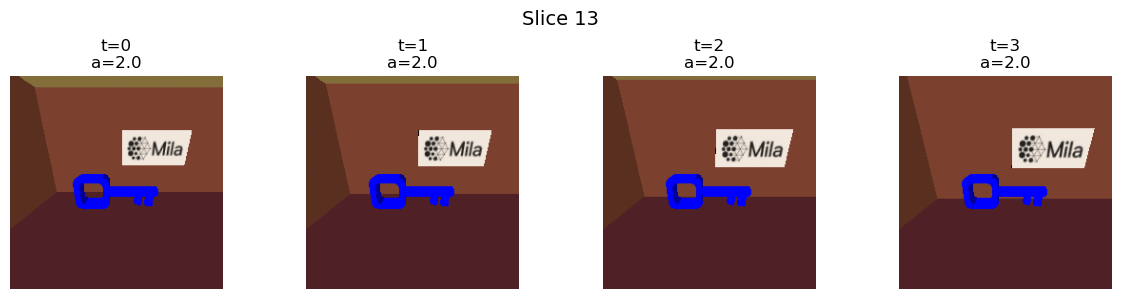

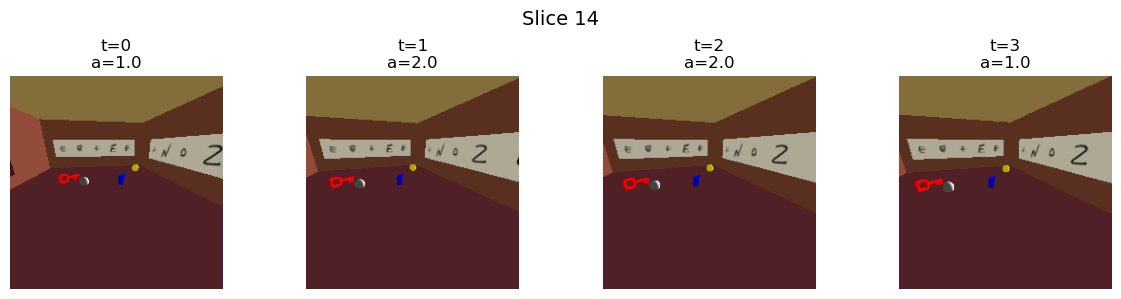

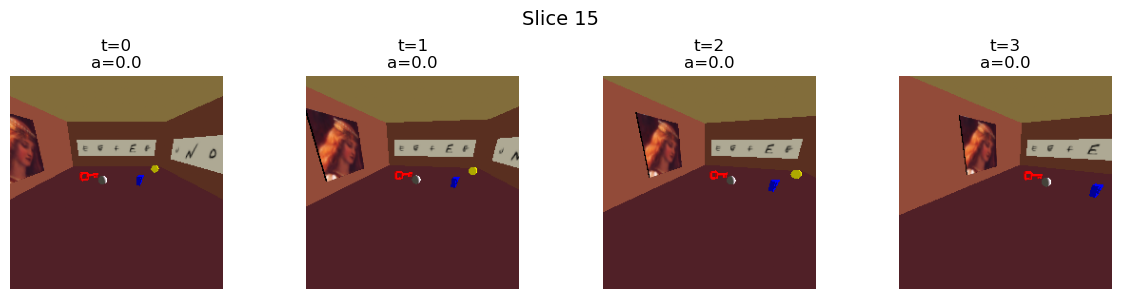

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid

# Choose how many slices to show (optional: set to None to show all)
max_slices = None  # or set to 50 to avoid overload
slice_count = len(datasets["valid"])
num_to_show = min(slice_count, max_slices) if max_slices is not None else slice_count

print(f"Showing {num_to_show} slices out of {slice_count}")

# Loop through the validation dataset
for i in range(num_to_show):
    obs, act, state = datasets["valid"][i]  # obs['visual'] ‚Üí [T, C, H, W], act ‚Üí [T, 1]

    visuals = obs["visual"]          # [T, C, H, W]
    actions = act.squeeze(-1)        # [T]

    T = visuals.shape[0]
    fig, axes = plt.subplots(1, T, figsize=(T * 3, 3))

    for t in range(T):
        img = visuals[t].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)

        ax = axes[t] if T > 1 else axes
        ax.imshow(img)
        ax.set_title(f"t={t}\na={actions[t].item()}")
        ax.axis("off")

    plt.suptitle(f"Slice {i}", fontsize=14)
    plt.tight_layout()
    plt.show()


Proprioceptive readings:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])

Actions:
 tensor([[2.],
        [2.],
        [5.],
        [0.]])

States:
 tensor([], size=(4, 0))


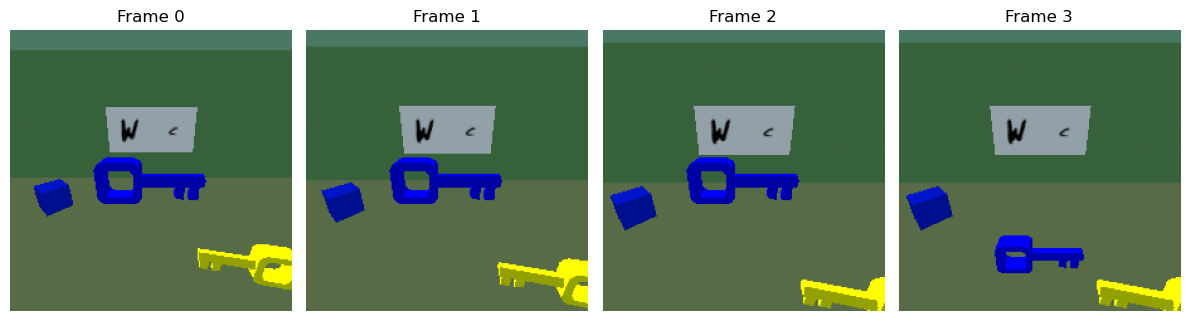


Combined table:
    proprio  action
0      0.0     2.0
1      0.0     2.0
2      0.0     5.0
3      0.0     0.0


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# ‚Äî assume you already have obs, act, state from
#     obs, act, state = datasets['train'][0]

# 1) Print out the raw proprio/action/state values:
print("Proprioceptive readings:\n", obs['proprio'])
print("\nActions:\n", act)
print("\nStates:\n", state)

# 2) Visualize the 3 RGB image frames
#    obs['visual'] is a tensor of shape [3, 3, 224, 224]
visual = obs['visual'].cpu().numpy()   # to HWC below

fig, axes = plt.subplots(1, visual.shape[0], figsize=(12, 4))
for i in range(visual.shape[0]):
    img = visual[i].transpose(1, 2, 0)  # C,H,W -> H,W,C
    axes[i].imshow(img)
    axes[i].set_title(f"Frame {i}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

# 3) Combine proprio, action, state into a small table
df = pd.DataFrame({
    "proprio": obs['proprio'].cpu().numpy().flatten(),
    "action": act.cpu().numpy().flatten(),
    #"state": state.cpu().numpy().flatten()
})
print("\nCombined table:\n", df)


First non-zero action indices: [0, 1, 2, 3, 4]

=== Snippet idx=0 ===
 Actions:
 tensor([[2.],
        [2.],
        [5.],
        [0.]])
 States:
 tensor([], size=(4, 0))
 Proprio:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])


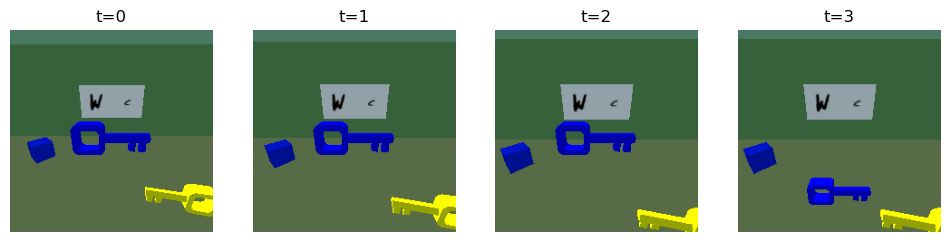


=== Snippet idx=1 ===
 Actions:
 tensor([[2.],
        [2.],
        [5.],
        [0.]])
 States:
 tensor([], size=(4, 0))
 Proprio:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])


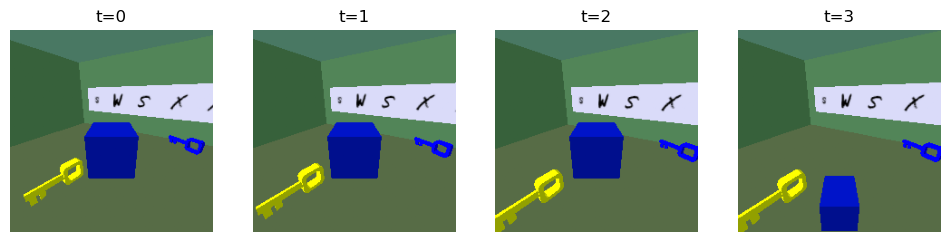


=== Snippet idx=2 ===
 Actions:
 tensor([[2.],
        [2.],
        [4.],
        [0.]])
 States:
 tensor([], size=(4, 0))
 Proprio:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])


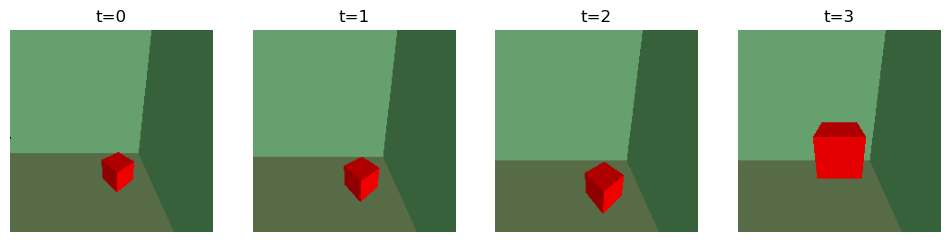


=== Snippet idx=3 ===
 Actions:
 tensor([[2.],
        [2.],
        [4.],
        [0.]])
 States:
 tensor([], size=(4, 0))
 Proprio:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])


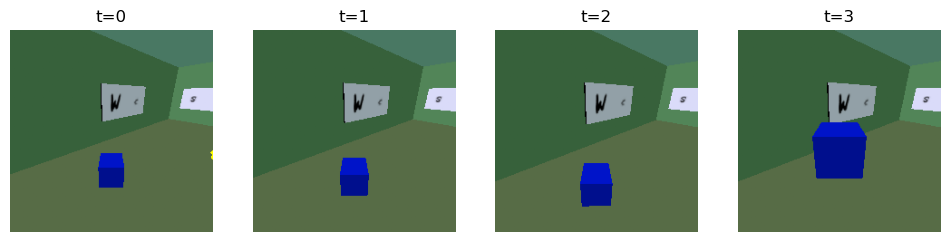


=== Snippet idx=4 ===
 Actions:
 tensor([[2.],
        [2.],
        [5.],
        [0.]])
 States:
 tensor([], size=(4, 0))
 Proprio:
 tensor([[0.],
        [0.],
        [0.],
        [0.]])


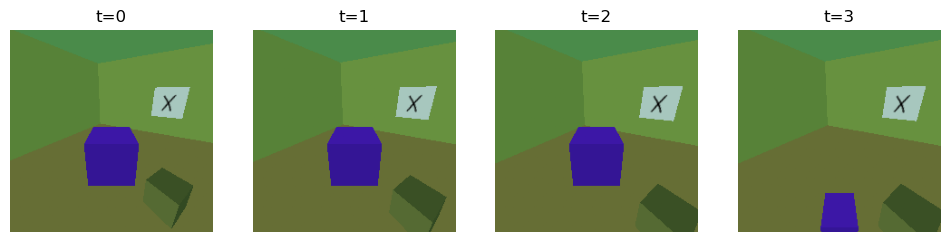

In [5]:
#import matplotlib.pyplot as plt

# 1) Find the first few non-zero snippets
train_ds = datasets['train']
nonzero = []
for idx in range(len(train_ds)):
    _, act, _ = train_ds[idx]
    if act.abs().sum().item() > 0:
        nonzero.append(idx)
    if len(nonzero) >= 5:
        break

print("First non-zero action indices:", nonzero)

# 2) For each, print the actions and plot the 3 frames
for idx in nonzero:
    obs, act, state = train_ds[idx]
    print(f"\n=== Snippet idx={idx} ===")
    print(" Actions:\n", act)
    print(" States:\n", state)
    print(" Proprio:\n", obs['proprio'])

    # Visualize the RGB frames
    visual = obs['visual'].cpu().numpy()  # [3,3,224,224]
    fig, axes = plt.subplots(1, visual.shape[0], figsize=(12,4))
    for t in range(visual.shape[0]):
        img = visual[t].transpose(1,2,0)
        axes[t].imshow(img)
        axes[t].set_title(f"t={t}")
        axes[t].axis("off")
    plt.show()


In [6]:
import random
import torch
from torch.utils.data import Subset

def select_condition_then_sample_rest(dataset, n_slices, target_actions={4, 5}, seed=42, verbose=False):
    """
    Selects all slices where action[-2] ‚àà target_actions,
    then adds random samples from the rest until n_slices is reached.
    Seeding ensures reproducibility.

    Args:
        dataset: the dataset to sample from
        n_slices: total number of slices desired
        target_actions: set of action values to select first
        seed: random seed for reproducibility
        verbose: whether to print debug info

    Returns:
        Subset containing n_slices elements
    """
    random.seed(seed)
    torch.manual_seed(seed)

    match_indices = []
    non_match_indices = []

    for idx in range(len(dataset)):
        obs, act, state = dataset[idx]
        if act.shape[0] >= 2:
            last_action = act[-2]
            action_val = int(last_action.item()) if last_action.ndim == 0 else int(last_action[0].item())
            if action_val in target_actions:
                match_indices.append(idx)
            else:
                non_match_indices.append(idx)
        else:
            non_match_indices.append(idx)

    if verbose:
        print(f"Matched: {len(match_indices)}, Non-matched: {len(non_match_indices)}")

    if len(match_indices) > n_slices:
        sampled_indices = random.sample(match_indices, n_slices)
    else:
        n_remaining = n_slices - len(match_indices)
        sampled_rest = random.sample(non_match_indices, min(n_remaining, len(non_match_indices)))
        sampled_indices = match_indices + sampled_rest

    return Subset(dataset, sampled_indices)


def summarize_dataset(dataset, name="Dataset", show_examples=False, max_examples=3):
    import numpy as np
    import torch

    seq_lens = []
    action_vals = []
    visual_shapes = set()
    proprio_shapes = set()
    state_shapes = set()

    for idx in range(len(dataset)):
        obs, act, state = dataset[idx]
        seq_lens.append(act.shape[0])
        
        if act.ndim == 2:
            action_vals.extend(act[:, 0].tolist())  # assumes 1D actions
        else:
            action_vals.extend(act.tolist())

        visual_shapes.add(tuple(obs['visual'].shape))
        proprio_shapes.add(tuple(obs['proprio'].shape))
        state_shapes.add(tuple(state.shape))

    print(f"üìä Summary of {name}")
    print("=" * (20 + len(name)))
    print(f"üü¢ Total samples      : {len(dataset)}")
    print(f"üìè Sequence length    : mean={np.mean(seq_lens):.2f}, min={min(seq_lens)}, max={max(seq_lens)}")
    print(f"üéÆ Action values      : min={np.min(action_vals)}, max={np.max(action_vals)}, unique={sorted(set(action_vals))}")
    print(f"üñºÔ∏è  Visual shapes     : {visual_shapes}")
    print(f"üí™ Proprio shapes     : {proprio_shapes}")
    print(f"üß† State shapes       : {state_shapes}")
    
    if show_examples:
        print("\nüîç Sample examples:")
        for idx in range(min(max_examples, len(dataset))):
            obs, act, state = dataset[idx]
            print(f"  ‚Ä¢ Sample {idx}:")
            print(f"    - visual: {obs['visual'].shape}")
            print(f"    - proprio: {obs['proprio'].shape}, example: {obs['proprio'][0]}")
            print(f"    - action: {act.shape}, example: {act[-2:]}")
            print(f"    - state: {state.shape}")
